In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [62]:
#intial_dataset = pd.read_csv("train.csv")

In [63]:
#dataset = pd.read_csv("train.csv")

In [64]:
#dataset = intial_dataset.sample(frac = 0.1,random_state=0)

In [65]:
#dataset.to_csv("dataset_sampled.csv")

In [49]:
dataset = pd.read_csv("dataset_sampled.csv")
test_dataset = pd.read_csv("test_data_v2.csv")

## Brief Analysis of dataset

In [78]:
dataset.shape

(1113547, 20)

In [10]:
test_dataset.shape

(64000, 14)

In [38]:
dataset.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,tolls_amount,improvement_surcharge,total_amount,TimeTravelled,PickUpTime,DayOfWeek,Velocity
count,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06,1.093320e+06
mean,1.530859e+00,1.658975e+00,3.004192e+00,-7.397307e+01,4.075089e+01,1.033927e+00,5.856474e-03,-7.397293e+01,4.075172e+01,1.347481e+00,3.189477e-01,2.999761e-01,1.643764e+01,8.872929e+02,1.403496e+01,2.977801e+00,3.182119e-03
std,4.990470e-01,1.304655e+00,3.611939e+00,3.890957e-02,2.835862e-02,3.700212e-01,7.630322e-02,3.590639e-02,3.225677e-02,4.916280e-01,1.379117e+00,2.676025e-03,1.294034e+01,7.088712e+02,6.479999e+00,1.897775e+00,1.704648e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.497944e+01,4.027691e+01,1.000000e+00,0.000000e+00,-7.497732e+01,4.019791e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399191e+01,4.073757e+01,1.000000e+00,0.000000e+00,-7.399130e+01,4.073620e+01,1.000000e+00,0.000000e+00,3.000000e-01,8.800000e+00,4.130000e+02,9.416667e+00,1.000000e+00,2.046205e-03
50%,2.000000e+00,1.000000e+00,1.710000e+00,-7.398157e+01,4.075416e+01,1.000000e+00,0.000000e+00,-7.397962e+01,4.075456e+01,1.000000e+00,0.000000e+00,3.000000e-01,1.230000e+01,6.930000e+02,1.460000e+01,3.000000e+00,2.833333e-03
75%,2.000000e+00,2.000000e+00,3.210000e+00,-7.396703e+01,4.076852e+01,1.000000e+00,0.000000e+00,-7.396284e+01,4.076980e+01,2.000000e+00,0.000000e+00,3.000000e-01,1.836000e+01,1.136000e+03,1.953333e+01,5.000000e+00,3.874092e-03
max,2.000000e+00,9.000000e+00,7.325000e+01,-7.311838e+01,4.190676e+01,9.900000e+01,1.000000e+00,-7.311838e+01,4.170646e+01,4.000000e+00,7.000000e+01,3.000000e-01,1.000000e+02,9.998000e+03,2.398333e+01,6.000000e+00,2.068966e-02


In [248]:
test_dataset.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,tolls_amount,improvement_surcharge,TimeTravelled,Velocity
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.00000,64000.000000,64000.000000,64000.000000
mean,1.537047,1.671188,5.896713,-73.960769,40.744481,1.406250,-73.975568,40.746855,1.337031,1.74787,0.299991,1230.515344,0.004041
std,0.498630,1.303686,7.234262,0.060701,0.037676,0.913769,0.084823,0.047903,0.492926,4.14628,0.001677,1080.955692,0.002608
min,1.000000,0.000000,0.010000,-74.527763,40.535580,1.000000,-74.833679,40.045311,1.000000,0.00000,0.000000,40.000000,0.000004
25%,1.000000,1.000000,1.200000,-73.991264,40.732536,1.000000,-73.993828,40.725780,1.000000,0.00000,0.300000,468.000000,0.002265
50%,2.000000,1.000000,2.260000,-73.980370,40.752197,1.000000,-73.980309,40.751484,1.000000,0.00000,0.300000,858.000000,0.003254
75%,2.000000,2.000000,8.080000,-73.962111,40.766815,1.000000,-73.960541,40.768697,2.000000,0.00000,0.300000,1659.000000,0.005039
max,2.000000,9.000000,86.600000,-72.659561,41.255787,5.000000,-72.551582,41.525589,4.000000,82.50000,0.300000,9931.000000,0.048936


In [80]:
dataset.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,DayOfWeek
0,510205,2,2016-06-02 00:34:25,2016-06-02 00:54:42,1,6.10,-73.994568,40.725990,1,N,...,40.799648,1,20.0,0.5,0.5,1.00,0.0,0.3,22.30,3
1,2638457,1,2016-06-11 13:48:02,2016-06-11 13:53:24,1,1.00,-73.990570,40.771523,1,N,...,40.759354,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50,5
2,7396380,1,2016-06-22 16:48:49,2016-06-22 16:55:02,1,0.70,-73.985054,40.768436,1,N,...,40.760925,1,6.0,1.0,0.5,1.95,0.0,0.3,9.75,2
3,4521493,2,2016-06-12 21:14:19,2016-06-12 21:20:48,1,1.05,-73.985710,40.750546,1,N,...,40.753746,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80,6
4,7461453,2,2016-06-22 19:56:50,2016-06-22 19:57:45,1,0.37,-73.963051,40.766579,1,N,...,40.771191,1,3.0,1.0,0.5,1.20,0.0,0.3,6.00,2


### Remove Features from Train not present in Test

In [86]:
dataset = dataset.drop("fare_amount",axis=1)
dataset = dataset.drop("extra",axis=1)
dataset = dataset.drop("mta_tax",axis=1)
dataset = dataset.drop("tip_amount",axis=1)
dataset = dataset.drop("Unnamed: 0",axis=1)
test_dataset = test_dataset.drop("id",axis=1)

### Initial Data Analysis

#### Analysis of total_amount feature

Negative Values in total_amount<br>
Max value of total_amount is 8452.8 dollar <br>
75 percentile value is 18.36$
75 percentile value of total_mount >100dollar is 141dollar

#### Other Interesting Feature

tpep_pickup_datetime - Catergorical(Timestamp)<br>
tpep_dropoff_datetime - Categorical(Timestamp)<br>
store_and_fwd_flag - Categorical <br>
ID - No use

## Exploratory Data Analysis

### Total Amount

In [104]:
dataset[(dataset['total_amount'] >= 100)].shape

(1936, 15)

In [4]:
dataset[(dataset['total_amount'] >= 100)].describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,tolls_amount,improvement_surcharge,total_amount
count,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000
mean,1.558884,1.543388,19.122629,-70.538369,38.874295,3.944731,-71.852264,39.559576,1.156508,11.221162,0.298605,139.707572
std,0.496649,1.102113,12.681103,15.488673,8.535946,3.301795,12.520169,6.893172,0.408930,23.023660,0.020412,197.517173
min,1.000000,0.000000,0.000000,-74.571724,0.000000,1.000000,-75.134460,0.000000,1.000000,0.000000,0.000000,100.000000
25%,1.000000,1.000000,14.600000,-73.988913,40.709557,3.000000,-74.177704,40.690469,1.000000,0.000000,0.300000,106.300000
50%,2.000000,1.000000,18.815000,-73.973629,40.753933,4.000000,-74.176746,40.695362,1.000000,11.080000,0.300000,116.815000
75%,2.000000,2.000000,25.330000,-73.863886,40.769690,5.000000,-73.871540,40.793442,1.000000,17.000000,0.300000,140.910000
max,2.000000,9.000000,98.000000,0.000000,41.366520,99.000000,0.000000,41.457458,4.000000,580.000000,0.300000,8452.800000


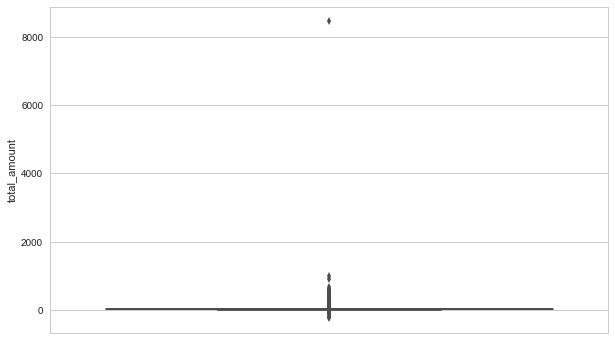

In [106]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(y="total_amount",data = dataset)

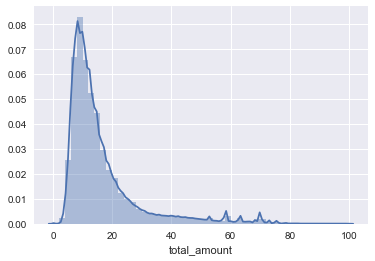

In [19]:
sns.set(color_codes=True)
sns.distplot(dataset["total_amount"])

### VendorID

A code indicating the TPEP provider that provided the record.
1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.

In [24]:
dataset["VendorID"].value_counts()

2    588678
1    524200
Name: VendorID, dtype: int64

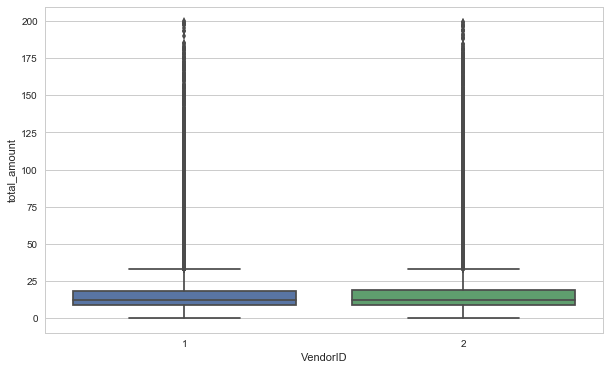

In [23]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="VendorID", y="total_amount", data=dataset)

### Passenger Count(Feature)

The number of passengers in the vehicle.
This is a driver-entered value.

In [25]:
dataset["passenger_count"].value_counts()

1    789398
2    160908
5     57552
3     46549
6     35900
4     22529
0        34
8         4
9         2
7         2
Name: passenger_count, dtype: int64

In [26]:
dataset["passenger_count"].mean()

1.6571457068968927

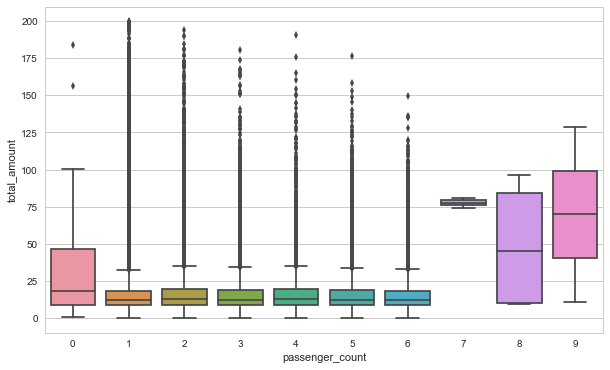

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="passenger_count", y="total_amount", data=dataset)

### store_and_fwd_flag

This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.

Y= store and forward trip

N= not a store and forward trip

In [11]:
dataset["store_and_fwd_flag"].value_counts()

N    553457
Y      3317
Name: store_and_fwd_flag, dtype: int64

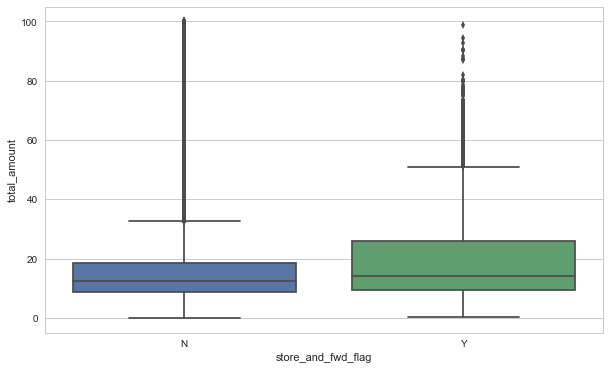

In [58]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="store_and_fwd_flag", y="total_amount", data=dataset)

In [ ]:
dataset.where(dataset["store_and_fwd_flag"]=="N").mean().loc["total_amount"]
#dataset.where(dataset["store_and_fwd_flag"]==0).mean().loc["total_amount"]

In [52]:
dataset.where(dataset["store_and_fwd_flag"]=="Y").mean().loc["total_amount"]

22.456562499999986

#### Feature Engineering Trip Distance

### RatecodeID

The final rate code in effect at the end of the trip.
1. Standard rate
2. JFK
3. Newark
4. Nassau or Westchester
5. Negotiated fare
6. Group ride

In [57]:
dataset["RatecodeID"].value_counts()

1     1067297
2       24650
5        2106
3        1464
4         414
99         11
6           9
Name: RatecodeID, dtype: int64

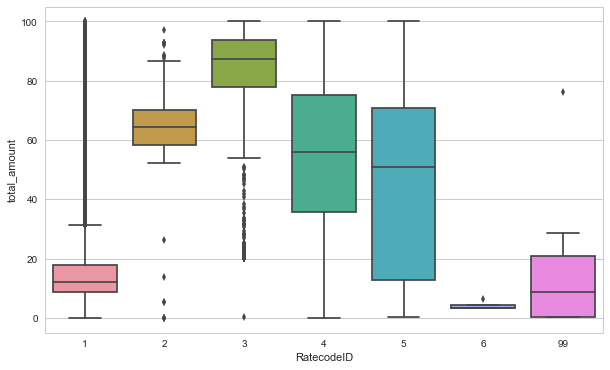

In [56]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="RatecodeID", y="total_amount", data=dataset)

### Payment Type

A numeric code signifying how the passenger paid for the trip.
1. Credit card
2. Cash
3. No charge
4. Dispute
5. Unknown
6. Voided trip

In [51]:
dataset["payment_type"].value_counts()

1    7374
2    3696
3      47
4      18
Name: payment_type, dtype: int64

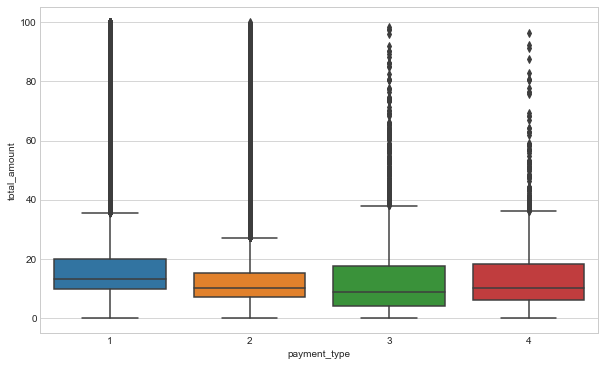

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="payment_type", y="total_amount", data=dataset)

### tolls_amount

Total amount of all tolls paid in trip.

In [5]:
dataset["tolls_amount"].describe()

count    1.113547e+06
mean     3.377642e-01
std      1.741324e+00
min     -1.050000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.800000e+02
Name: tolls_amount, dtype: float64

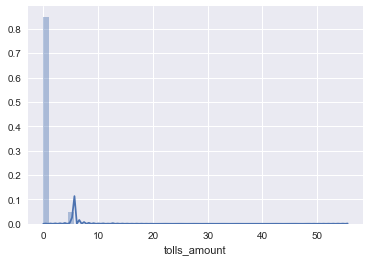

In [33]:
sns.set(color_codes=True)
sns.distplot(dataset["tolls_amount"])

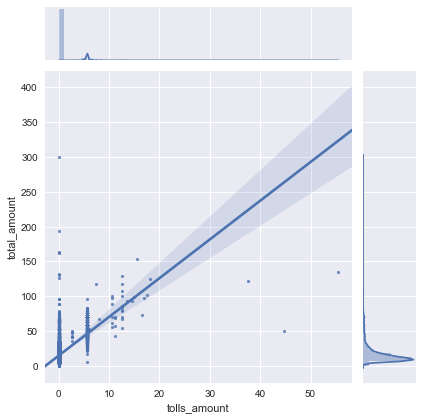

In [35]:
gridA = sns.JointGrid(x="tolls_amount", y="total_amount", data=dataset, size=6)
#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

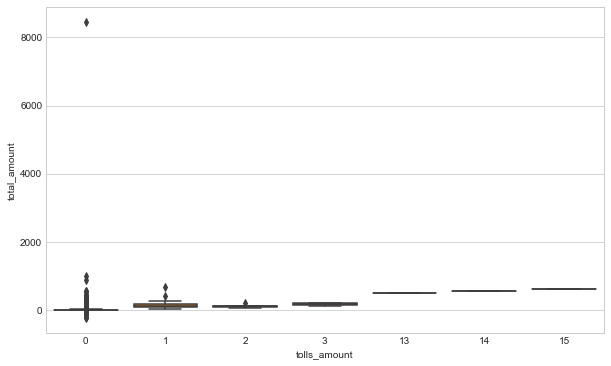

In [14]:
dataset["tolls_amount"] = pd.DataFrame(pd.cut(dataset["tolls_amount"], bins = 8,labels = [0,1,2,3,4,5,6,7]))
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="tolls_amount", y="total_amount",data = dataset)

### improvement_surcharge

$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.

In [37]:
dataset["improvement_surcharge"].describe()

count    11135.000000
mean         0.299946
std          0.004020
min          0.000000
25%          0.300000
50%          0.300000
75%          0.300000
max          0.300000
Name: improvement_surcharge, dtype: float64

In [3]:
dataset["improvement_surcharge"].value_counts()

 0.30    1112808
-0.30        505
 0.00        232
 0.26          1
 0.94          1
Name: improvement_surcharge, dtype: int64

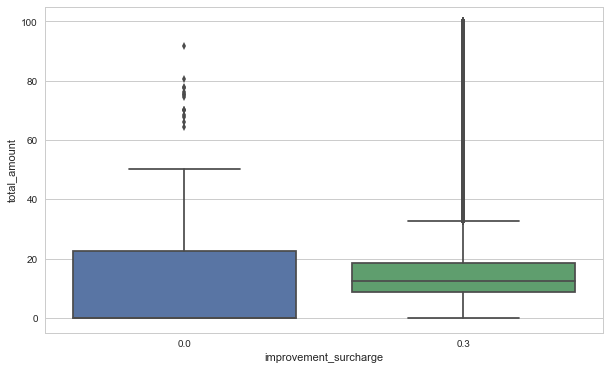

In [59]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="improvement_surcharge", y="total_amount", data=dataset)

### Latiture and Longitude

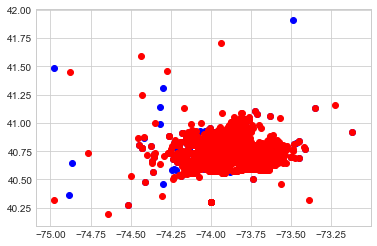

In [44]:
import matplotlib.pyplot as plt
plt.scatter(dataset["pickup_longitude"],dataset["pickup_latitude"],c = "blue")
plt.scatter(dataset["dropoff_longitude"],dataset["dropoff_latitude"],c = "red")

In [29]:
dataset["pickup_longitude"].describe()

count    1.111117e+06
mean    -7.306587e+01
std      8.142411e+00
min     -1.161129e+02
25%     -7.399177e+01
50%     -7.398135e+01
75%     -7.396622e+01
max      0.000000e+00
Name: pickup_longitude, dtype: float64

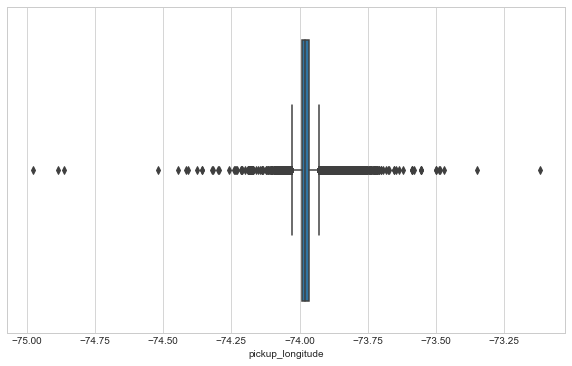

In [154]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="pickup_longitude",data = dataset)

Outlier in Pickup longitude
-  most data between -80 and -60

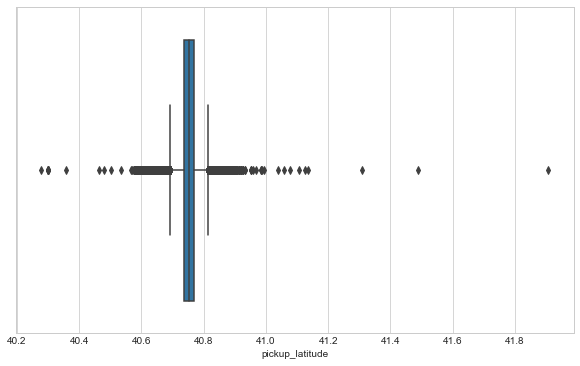

In [49]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="pickup_latitude",data = dataset)

Outlier in Pickup latitude
-  most data between 35 and 50

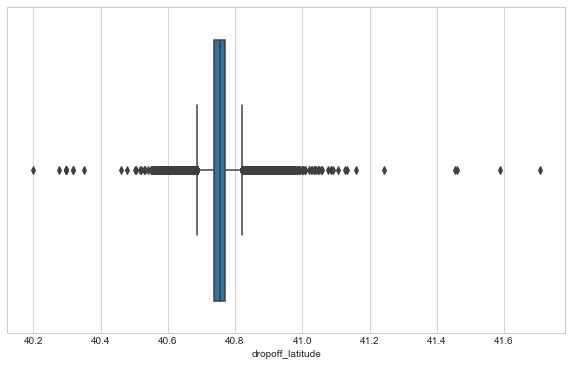

In [50]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="dropoff_latitude",data = dataset)

Outlier in Dropoff latitude
-  most data between 35 and 50

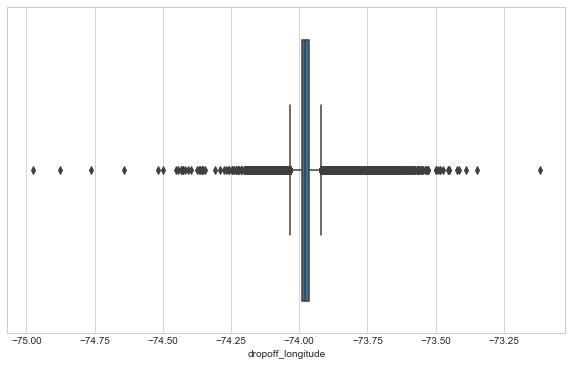

In [214]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="dropoff_longitude",data = dataset)

Outlier in Dropoff longitude
-  most data between -81 to -68

## Correlation

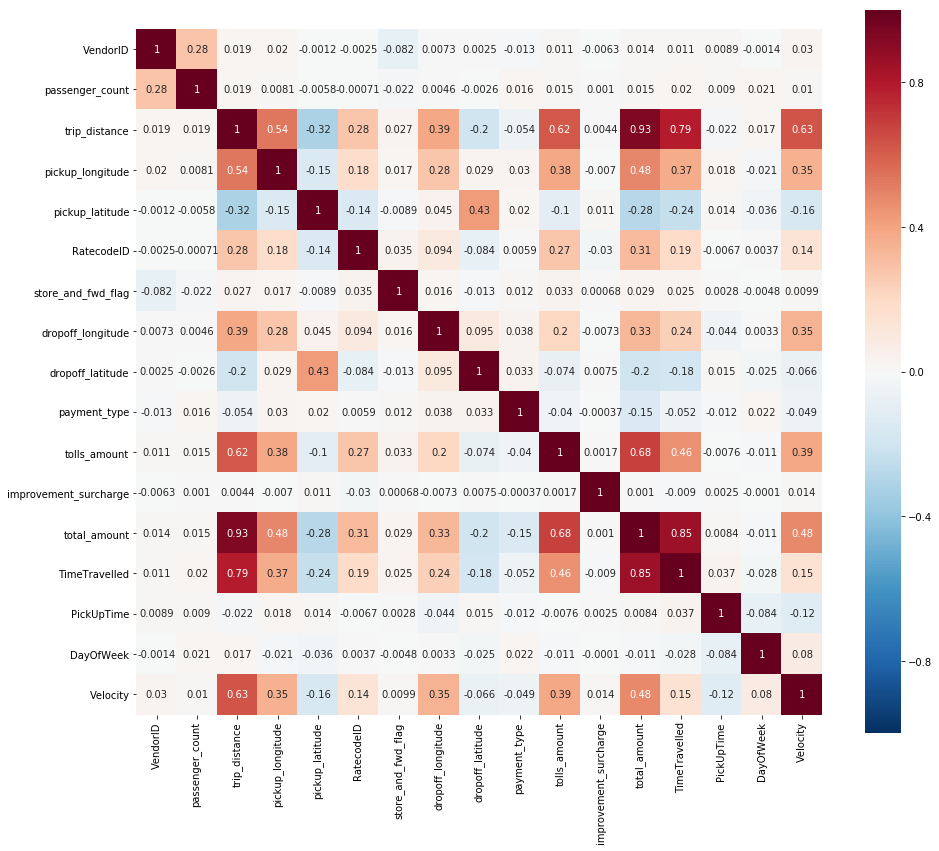

In [39]:
#Correlation of features
corr_features = dataset
cmat = corr_features.corr()
f, ax = plt.subplots(figsize=(14,12))
sns.heatmap(cmat,square=True,annot=True,linewidths=0, vmin=-1,cmap="RdBu_r")
f.tight_layout()
#plt.savefig("corr.png")
plt.show()

## Feature Engineering

### Trip Distance

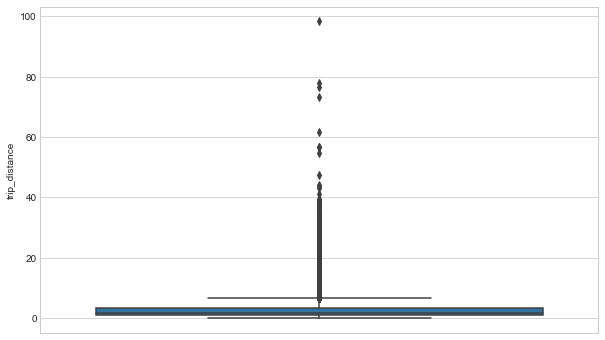

In [224]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(y="trip_distance",data = dataset)

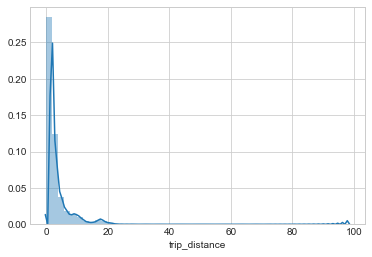

In [223]:
sns.distplot(dataset["trip_distance"])

In [219]:
dataset[(dataset['trip_distance'] >= 100)].shape  

(0, 15)

In [50]:
dataset = dataset[(dataset['trip_distance'] <= 100)]  
dataset.shape

(1113541, 20)

### Total Amount

In [51]:
dataset = dataset[(dataset['total_amount'] >= 0)]
dataset.shape

(1113035, 20)

In [52]:
dataset = dataset[(dataset['total_amount'] <= 100)]
dataset.shape

(1111111, 20)

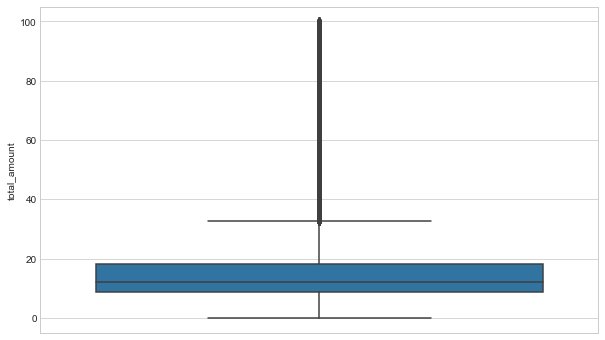

In [53]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(y="total_amount",data = dataset)

In [141]:
dataset.describe()

,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,tolls_amount,total_amount,TimeTravelled,Velocity,Pick Up Time
count,1.094995e+06,1.094995e+06,1.094995e+06,1.094995e+06,1.094995e+06,1.094995e+06,1.094995e+06,1.094995e+06,1.094995e+06,1.094995e+06,1.094995e+06,1.094995e+06
mean,3.005406e+00,-7.397307e+01,4.075089e+01,1.034162e+00,-7.397293e+01,4.075171e+01,1.347648e+00,3.191369e-01,1.644092e+01,1.006899e+03,3.177366e-03,1.403488e+01
std,3.614975e+00,3.892347e-02,2.836858e-02,3.930121e-01,3.591475e-02,3.226469e-02,4.916603e-01,1.379440e+00,1.294448e+01,3.227615e+03,1.707701e-03,6.480353e+00
min,0.000000e+00,-7.497944e+01,4.027691e+01,1.000000e+00,-7.497732e+01,4.019791e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,-7.399191e+01,4.073757e+01,1.000000e+00,-7.399130e+01,4.073619e+01,1.000000e+00,0.000000e+00,8.800000e+00,4.140000e+02,2.041985e-03,9.416667e+00
50%,1.710000e+00,-7.398157e+01,4.075416e+01,1.000000e+00,-7.397962e+01,4.075456e+01,1.000000e+00,0.000000e+00,1.230000e+01,6.940000e+02,2.830626e-03,1.460000e+01
75%,3.210000e+00,-7.396703e+01,4.076851e+01,1.000000e+00,-7.396284e+01,4.076979e+01,2.000000e+00,0.000000e+00,1.836000e+01,1.139000e+03,3.871914e-03,1.953333e+01
max,7.800000e+01,-7.311838e+01,4.190676e+01,9.900000e+01,-7.311838e+01,4.170646e+01,4.000000e+00,7.000000e+01,1.000000e+02,8.639800e+04,2.068966e-02,2.398333e+01


### Tolls Amount

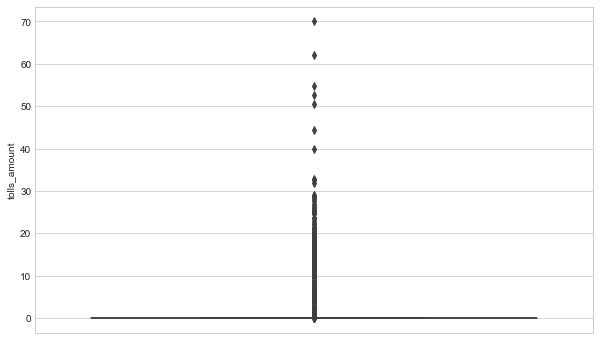

In [151]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(y="tolls_amount", data=dataset)

In [54]:
dataset = dataset[(dataset['tolls_amount'] >= 0)]
dataset.shape

(1111111, 20)

In [55]:
dataset = dataset[(dataset['tolls_amount'] <= 100)]  
dataset.shape

(1111111, 20)

### Time travelled - Pickup and Dropoff time(Minutes)

In [56]:
dataset["tpep_pickup_datetime"] = pd.to_datetime(dataset.tpep_pickup_datetime)
dataset["tpep_dropoff_datetime"] = pd.to_datetime(dataset.tpep_dropoff_datetime)
test_dataset["tpep_pickup_datetime"] = pd.to_datetime(test_dataset.tpep_pickup_datetime)
test_dataset["tpep_dropoff_datetime"] = pd.to_datetime(test_dataset.tpep_dropoff_datetime)

In [57]:
timeInterval = dataset["tpep_dropoff_datetime"]-dataset["tpep_pickup_datetime"]
timeInterval_test = test_dataset["tpep_dropoff_datetime"]-test_dataset["tpep_pickup_datetime"]

In [309]:
timeInterval.head()

0   00:20:17
1   00:05:22
2   00:06:13
3   00:06:29
4   00:00:55
dtype: timedelta64[ns]

In [310]:
timeInterval_test.head()

0   00:03:22
1   00:04:00
2   00:12:36
3   00:07:14
4   00:26:04
dtype: timedelta64[ns]

In [58]:
timeInterval = (timeInterval/np.timedelta64(1, 's'))
timeInterval_test = (timeInterval_test/np.timedelta64(1, 's'))

In [59]:
dataset["TimeTravelled"] = timeInterval
test_dataset["TimeTravelled"] = timeInterval_test

In [60]:
dataset = dataset[(dataset['TimeTravelled'] >= 0)]
dataset = dataset[(dataset['TimeTravelled'] <= 10000)]

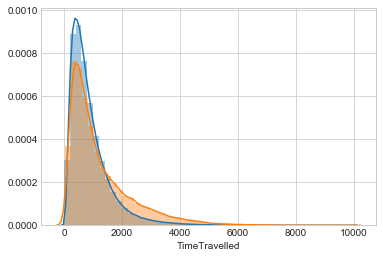

In [92]:
sns.distplot(dataset["TimeTravelled"])
sns.distplot(test_dataset["TimeTravelled"])

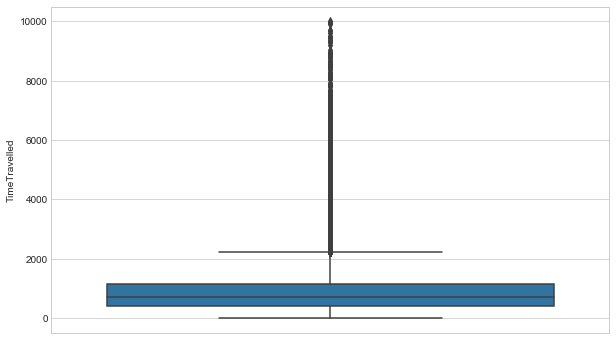

In [316]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(y="TimeTravelled",data = dataset)

In [147]:
#dataset[(dataset['TimeTravelled'] > 10000)]
dataset.head()

(1640, 14)

In [235]:
dataset['TimeTravelled'].describe()

count    1.109447e+06
mean     8.847444e+02
std      7.096968e+02
min      0.000000e+00
25%      4.110000e+02
50%      6.910000e+02
75%      1.134000e+03
max      9.998000e+03
Name: TimeTravelled, dtype: float64

### PickUp time Feature

In [61]:
#dataset["Travelling Time"] = (dataset.tpep_dropoff_datetime - dataset.tpep_pickup_datetime)
hours = dataset["tpep_pickup_datetime"].dt.hour
minutes = dataset["tpep_pickup_datetime"].dt.minute
hours_test = test_dataset["tpep_pickup_datetime"].dt.hour
minutes_test = test_dataset["tpep_pickup_datetime"].dt.minute

In [63]:
minutes = minutes.abs()
hours = hours.abs()
minutes_test = minutes_test.abs()
hours_test = hours_test.abs()

In [64]:
pickUpTime = hours + minutes/60

In [65]:
pickUpTime_test = hours_test + minutes_test/60

In [66]:
dataset["PickUpTime"] =  pickUpTime.abs()
test_dataset["PickUpTime"] =  pickUpTime_test.abs()

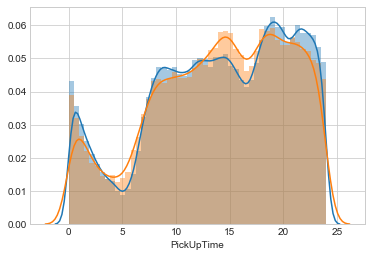

In [67]:
sns.distplot(dataset["PickUpTime"])
sns.distplot(test_dataset["PickUpTime"])

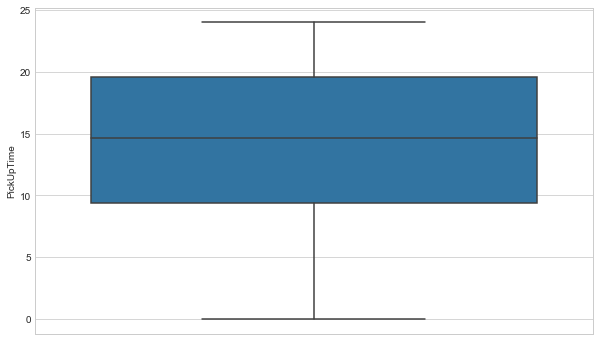

In [324]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(y="PickUpTime",data = dataset)

### Dropoff Time

In [68]:
hours = dataset["tpep_dropoff_datetime"].dt.hour
minutes = dataset["tpep_dropoff_datetime"].dt.minute
hours_test = test_dataset["tpep_dropoff_datetime"].dt.hour
minutes_test = test_dataset["tpep_dropoff_datetime"].dt.minute

In [69]:
minutes = minutes.abs()
hours = hours.abs()
minutes_test = minutes_test.abs()
hours_test = hours_test.abs()

In [70]:
dropOffTime = hours + minutes/60
dropOffTime_test = hours_test + minutes_test/60

In [71]:
dataset["DropOffTime"] =  dropOffTime.abs()
test_dataset["DropOffTime"] =  dropOffTime_test.abs()

### Day of the week

In [72]:
s = []
s_test = []
pickup = pd.to_datetime(dataset.tpep_pickup_datetime)
pickup_test = pd.to_datetime(test_dataset.tpep_pickup_datetime)

In [73]:
from datetime import datetime
for i in range(dataset.shape[0]):
    s.append(datetime.weekday(pickup.iloc[i]))    

In [74]:
for j in range(test_dataset.shape[0]):
    s_test.append(datetime.weekday(pickup_test.iloc[j]))

In [75]:
dataset["DayOfWeek"] = s
test_dataset["DayOfWeek"] = s_test

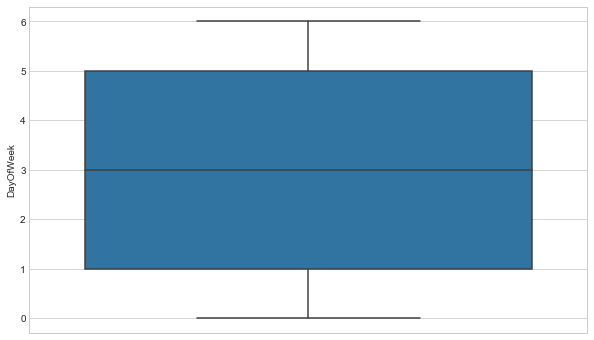

In [102]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(y="DayOfWeek",data = dataset)

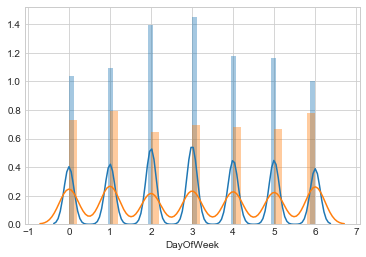

In [109]:
sns.distplot(dataset["DayOfWeek"])
sns.distplot(test_dataset["DayOfWeek"])

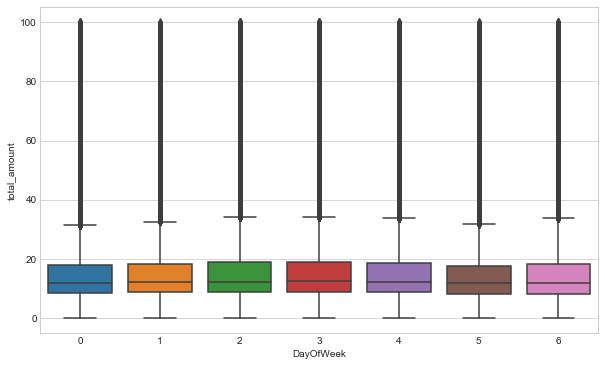

In [36]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x = "DayOfWeek",y="total_amount",data = dataset)

### Velocity Feature

In [76]:
dataset["Velocity"] = (dataset["trip_distance"]/dataset["TimeTravelled"])
test_dataset["Velocity"] = (test_dataset["trip_distance"]/test_dataset["TimeTravelled"])

In [77]:
#dataset = dataset.replace([np.inf, -np.inf], np.nan)
#test_dataset = test_dataset.replace([np.inf, -np.inf], np.nan)
#dataset = dataset.replace(np.nan,0)
#test_dataset = test_dataset.replace(np.nan,0)

In [78]:
dataset[(dataset['Velocity'] > 0.0207124)].shape

(1022, 25)

In [79]:
dataset = dataset[(dataset['Velocity'] < 0.0207124)]
dataset.shape

(1107304, 25)

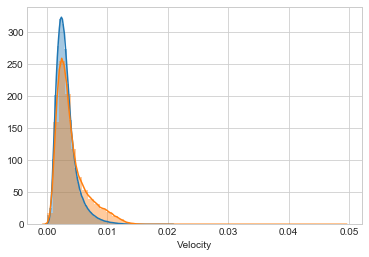

In [80]:
sns.distplot(dataset["Velocity"])
sns.distplot(test_dataset["Velocity"])

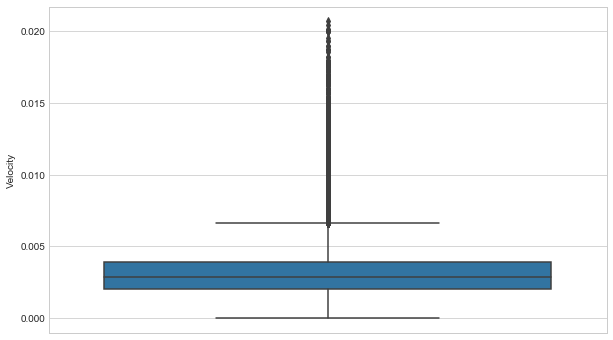

In [331]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(y="Velocity",data = dataset)

## Pickup and DropOff location

In [81]:
dataset = dataset[(dataset['pickup_longitude'] >= -75)]
dataset = dataset[(dataset['pickup_longitude'] <= -72)]  
#dataset["pickup_longitude"] = pd.DataFrame(pd.cut(dataset["pickup_longitude"], bins = 64,labels = f))
dataset.shape

(1093809, 25)

In [82]:
dataset = dataset[(dataset['pickup_latitude'] >= 40)]
dataset = dataset[(dataset['pickup_latitude'] <= 42)]  
#dataset["pickup_latitude"] = pd.DataFrame(pd.cut(dataset["pickup_latitude"], bins = 64,labels =f))
dataset.shape

(1093807, 25)

In [83]:
dataset = dataset[(dataset['dropoff_longitude'] >= -75)]
dataset = dataset[(dataset['dropoff_longitude'] <=-72)]  
#dataset["dropoff_longitude"] = pd.DataFrame(pd.cut(dataset["dropoff_longitude"], bins = 64,labels = f))
dataset.shape

(1093320, 25)

In [84]:
dataset = dataset[(dataset['dropoff_latitude'] >= 40)]
dataset = dataset[(dataset['dropoff_latitude'] <= 42)]  
#dataset["dropoff_latitude"] = pd.DataFrame(pd.cut(dataset["dropoff_latitude"], bins = 64,labels = [0:63]))
dataset.shape

(1093320, 25)

## store_and_fwd_flag feature

In [85]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
dataset["store_and_fwd_flag"] = encoder.fit_transform(dataset["store_and_fwd_flag"])
test_dataset["store_and_fwd_flag"] = encoder.fit_transform(test_dataset["store_and_fwd_flag"])

In [87]:
dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,tolls_amount,improvement_surcharge,total_amount,TimeTravelled,PickUpTime,DropOffTime,DayOfWeek,Velocity
0,2,2016-06-02 00:34:25,2016-06-02 00:54:42,1,6.10,-73.994568,40.725990,1,0,-73.960747,40.799648,1,0.0,0.3,22.30,1217.0,0.566667,0.900000,3,0.005012
1,1,2016-06-11 13:48:02,2016-06-11 13:53:24,1,1.00,-73.990570,40.771523,1,0,-73.995148,40.759354,1,0.0,0.3,8.50,322.0,13.800000,13.883333,5,0.003106
2,1,2016-06-22 16:48:49,2016-06-22 16:55:02,1,0.70,-73.985054,40.768436,1,0,-73.983154,40.760925,1,0.0,0.3,9.75,373.0,16.800000,16.916667,2,0.001877
3,2,2016-06-12 21:14:19,2016-06-12 21:20:48,1,1.05,-73.985710,40.750546,1,0,-73.978607,40.753746,2,0.0,0.3,7.80,389.0,21.233333,21.333333,6,0.002699
4,2,2016-06-22 19:56:50,2016-06-22 19:57:45,1,0.37,-73.963051,40.766579,1,0,-73.959557,40.771191,1,0.0,0.3,6.00,55.0,19.933333,19.950000,2,0.006727


### Delete Features

#### Match features of test dataset

In [88]:
dataset = dataset.drop("tpep_pickup_datetime",axis=1)
dataset = dataset.drop("tpep_dropoff_datetime",axis=1)
test_dataset = test_dataset.drop("tpep_pickup_datetime",axis=1)
test_dataset = test_dataset.drop("tpep_dropoff_datetime",axis=1)

#### Delete Other useless features

In [65]:
dataset = dataset.drop("VendorID",axis=1)
test_dataset = test_dataset.drop("VendorID",axis=1)

In [66]:
dataset = dataset.drop("passenger_count",axis=1)
test_dataset = test_dataset.drop("passenger_count",axis=1)

In [18]:
dataset = dataset.drop("improvement_surcharge",axis=1)
test_dataset = test_dataset.drop("improvement_surcharge",axis=1)

In [19]:
dataset = dataset.drop("store_and_fwd_flag",axis=1)
test_dataset = test_dataset.drop("store_and_fwd_flag",axis=1)

#### Delete Coordinates

In [20]:
dataset = dataset.drop("dropoff_latitude",axis=1)
test_dataset = test_dataset.drop("dropoff_latitude",axis=1)

In [21]:
dataset = dataset.drop("pickup_latitude",axis=1)
test_dataset = test_dataset.drop("pickup_latitude",axis=1)

In [22]:
dataset = dataset.drop("dropoff_longitude",axis=1)
test_dataset = test_dataset.drop("dropoff_longitude",axis=1)

In [23]:
dataset = dataset.drop("pickup_longitude",axis=1)
test_dataset = test_dataset.drop("pickup_longitude",axis=1)

In [89]:
dataset.shape

(1093320, 18)

In [90]:
test_dataset.shape

(64000, 17)

### Split into features and labels

In [91]:
features = dataset.drop("total_amount",axis = 1)
labels = dataset["total_amount"]

### Model Training and Testing

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.25, random_state=0)

In [93]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
#from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [94]:
from sklearn.metrics import mean_absolute_error
y_pred = regressor.predict(X_test)
print("MAE:",mean_absolute_error(y_pred,y_test))#0.7956703873136262,0.7595473406351158,0.759758410391889

MAE: 0.759758410391889


### Cross Validation

In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [60]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0) 
sumE = 0
iterations = 0
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index] 
    y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    sumE += mean_absolute_error(y_pred,y_test)
    iterations = iterations + 1
    
print(iterations)
sumE = sumE/iterations
print("MAE:",sumE)#2.547684505694716

30
MAE: 2.5476248494962364


### Testing Model

In [95]:
pd.DataFrame(y_pred).describe()

,0
count,273330.000000
mean,16.366479
std,12.754088
min,0.000000
25%,8.779000
50%,12.221000
75%,18.373000
max,98.287000


In [96]:
pd.DataFrame(y_test).describe()

,total_amount
count,273330.000000
mean,16.381572
std,12.866134
min,0.000000
25%,8.800000
50%,12.300000
75%,18.350000
max,100.000000


In [97]:
np.corrcoef(y_pred,y_test)#0.98894423,0.99011713,0.9902581,0.99027593

array([[1.        , 0.99027593],
       [0.99027593, 1.        ]])

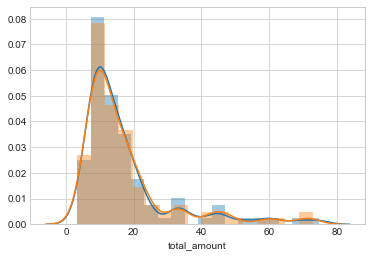

In [98]:
sns.distplot(y_pred[0:100])
sns.distplot(y_test[0:100])

In [99]:
pd.DataFrame(y_test).head()

,total_amount
333867,17.15
853985,11.75
37097,14.69
65472,11.60
553098,7.30


In [100]:
pd.DataFrame(y_pred).head()

,0
0,15.856
1,11.851
2,13.017
3,10.958
4,8.945


### Predicting on test dataset

In [101]:
y_pred_test = regressor.predict(test_dataset)
#y_pred_test[y_pred_test<0] = 0

In [102]:
arange = np.arange(1,y_pred_test.size+1)
df = pd.DataFrame({"ID" : arange, "total_amount" : y_pred_test})
df.to_csv("result1.csv", index=False)

In [103]:
pd.DataFrame(y_pred_test).describe()

,0
count,64000.000000
mean,27.402934
std,25.868866
min,0.300000
25%,9.500000
50%,14.618000
75%,38.450000
max,99.092000


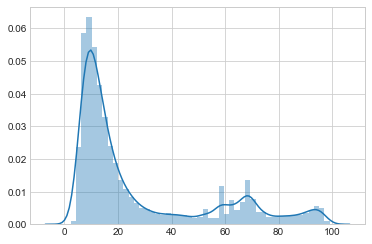

In [104]:
sns.distplot(y_pred_test)